<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/sales_forecasting%20using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [120]:
data=pd.read_csv("train.csv")

In [76]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [121]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [122]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [123]:
data["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"},inplace=True)

In [124]:
#Filling Nan values with mean
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)

In [125]:
data["Outlet_Size"].fillna(0,inplace=True)

In [126]:
#Filling Nan values with mode
data["Outlet_Size"].replace({0:"Medium"},inplace=True)

In [127]:
data["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [128]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [129]:
n=[]
for i in range(len(data)):
    n.append(data["Item_Identifier"][i][0:2])
new=pd.DataFrame({"Item_Type_Combined":n})
new
df=pd.concat([new,data],axis=1)

In [130]:
df["Item_Type_Combined"].replace({"FD":"Food","DR":"Drinks","NC":"Non-Consumable"},inplace=True)

In [131]:
#If Item_Type_Combined is non-consumable then we are replacing item_fat_content as non-edible
df.loc[df["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"
df["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [132]:
#since this data is taken at the year of 2013
df["Outlet_Year"]=2013-df["Outlet_Establishment_Year"]

In [133]:
df

,Item_Type_Combined,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,Food,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,Drinks,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,Food,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,Food,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,Non-Consumable,NCD19,8.930,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26
8519,Food,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,Non-Consumable,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,Food,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


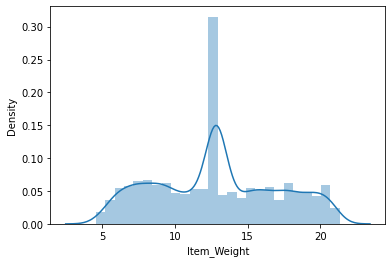

In [134]:
#univariant analysis
sns.distplot(df["Item_Weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


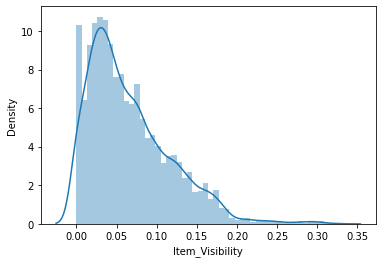

In [135]:
sns.distplot(df["Item_Visibility"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


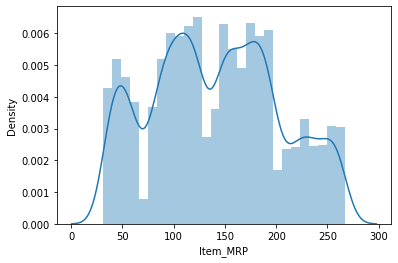

In [136]:
sns.distplot(df["Item_MRP"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


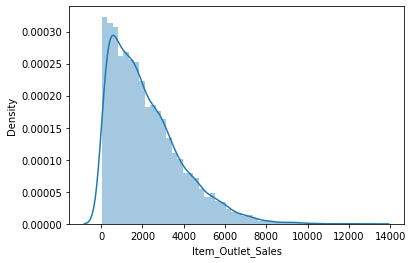

In [137]:
sns.distplot(df["Item_Outlet_Sales"])

In [138]:
#since the outlet sales is right skewed we are doing Log transformation
df["Item_Outlet_Sales"]=np.log(1+df["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


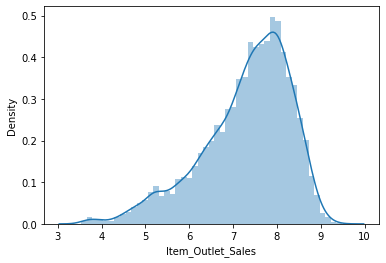

In [139]:
sns.distplot(df["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


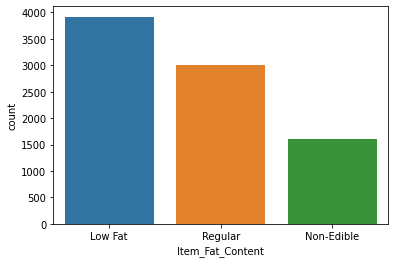

In [140]:
sns.countplot(df["Item_Fat_Content"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


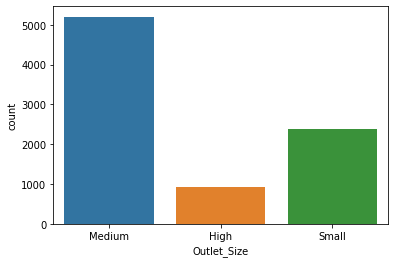

In [142]:
sns.countplot(df["Outlet_Size"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


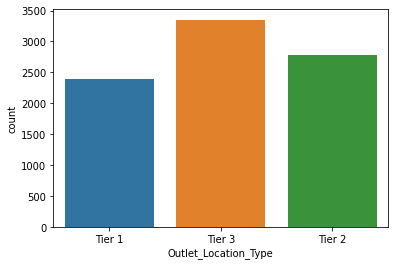

In [143]:
sns.countplot(df["Outlet_Location_Type"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


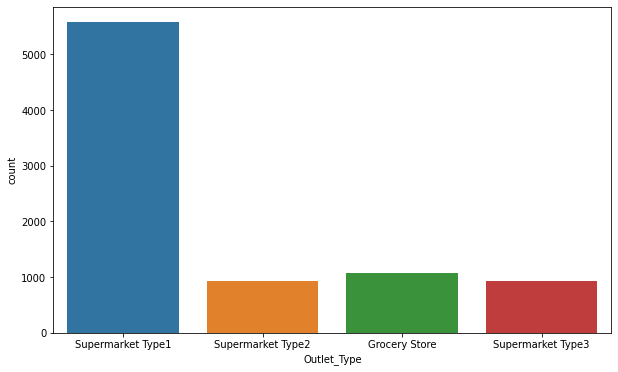

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(df["Outlet_Type"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


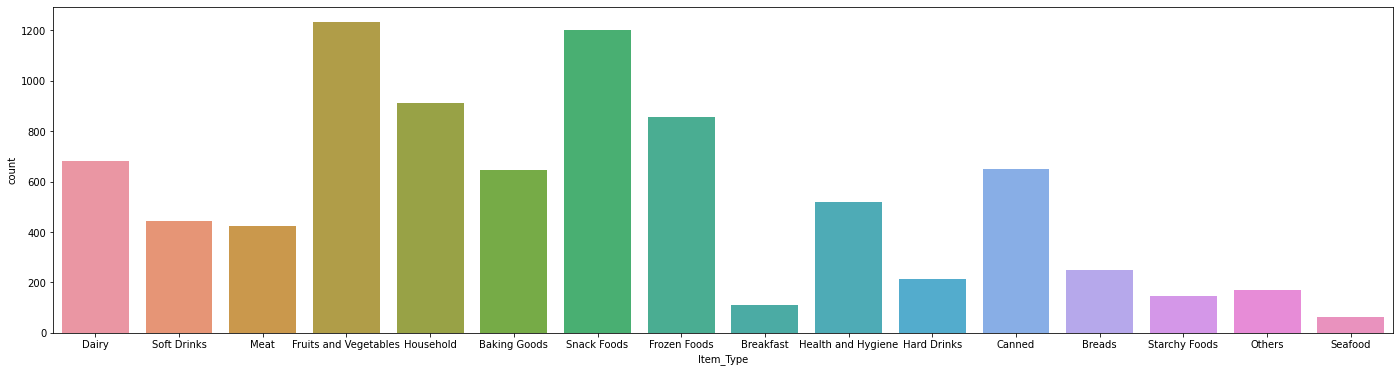

In [145]:
plt.figure(figsize=(24,6))
sns.countplot(df["Item_Type"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


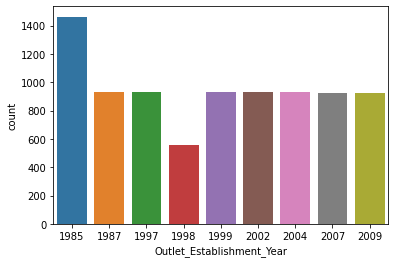

In [146]:
sns.countplot(df["Outlet_Establishment_Year"])

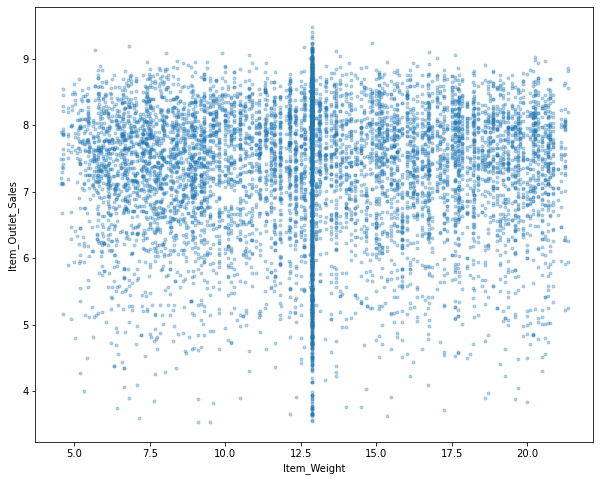

In [147]:
#Bivariant analysis
plt.figure(figsize=(10,8))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.plot(df["Item_Weight"],df["Item_Outlet_Sales"],".",alpha=0.3)

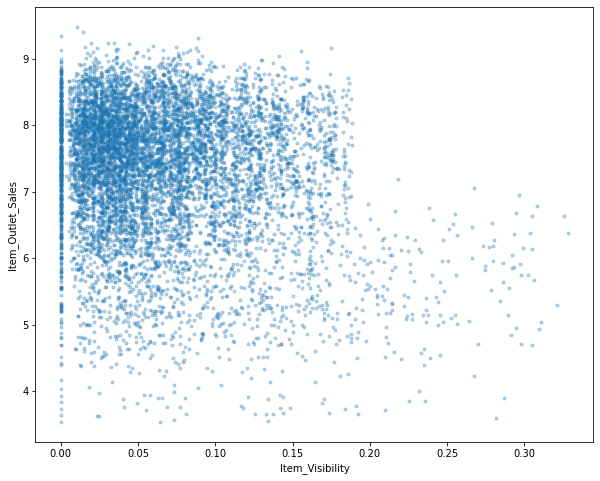

In [148]:
plt.figure(figsize=(10,8))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(df["Item_Visibility"],df["Item_Outlet_Sales"],".",alpha=0.3)

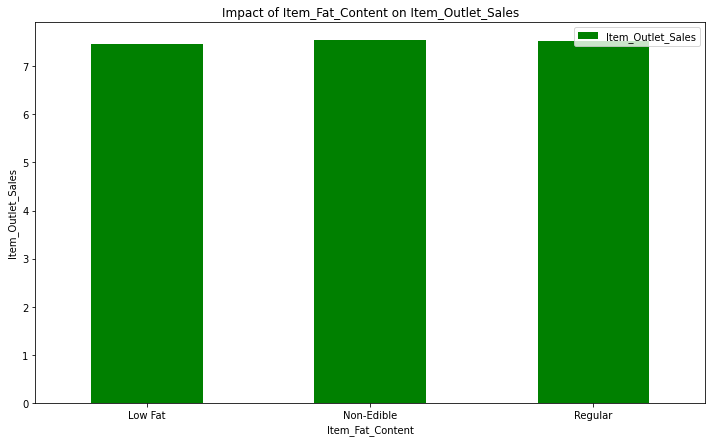

In [149]:
Item_Fat_Content_pivot =df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


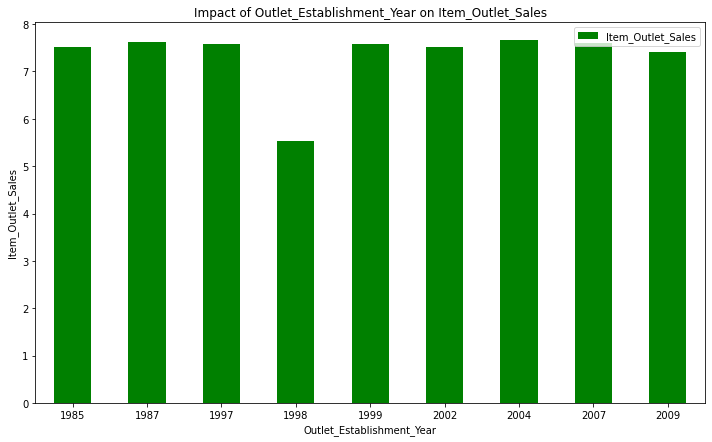

In [152]:
Outlet_Establishment_Year_pivot =df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


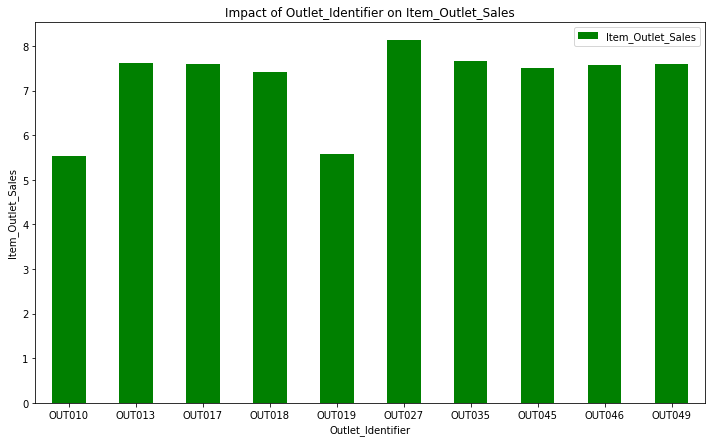

In [153]:
Outlet_Identifier_pivot =df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


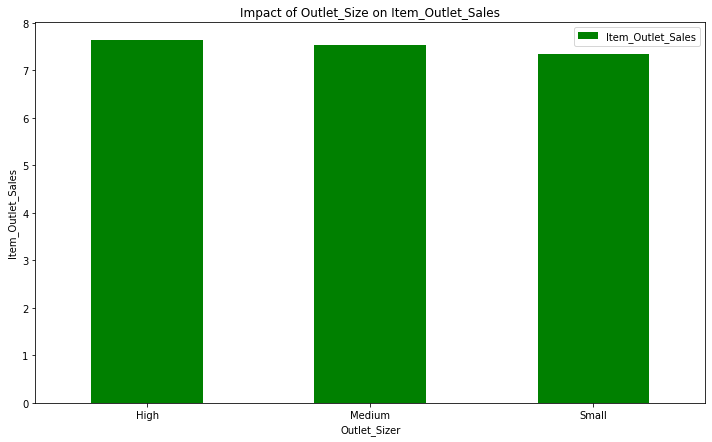

In [154]:
Outlet_Size_pivot =df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Sizer")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


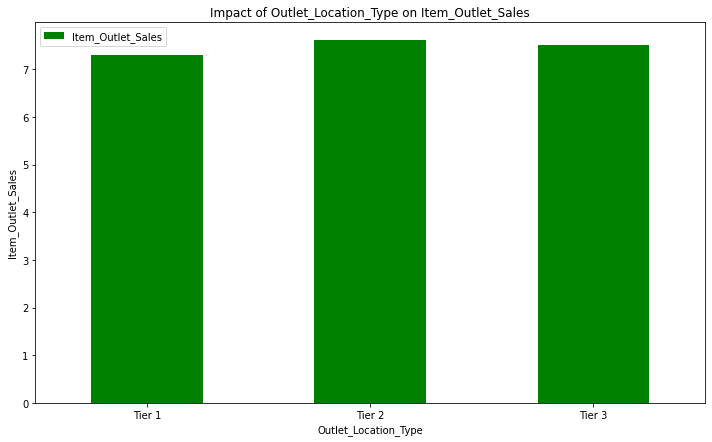

In [155]:
Outlet_Location_Type_pivot =df.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

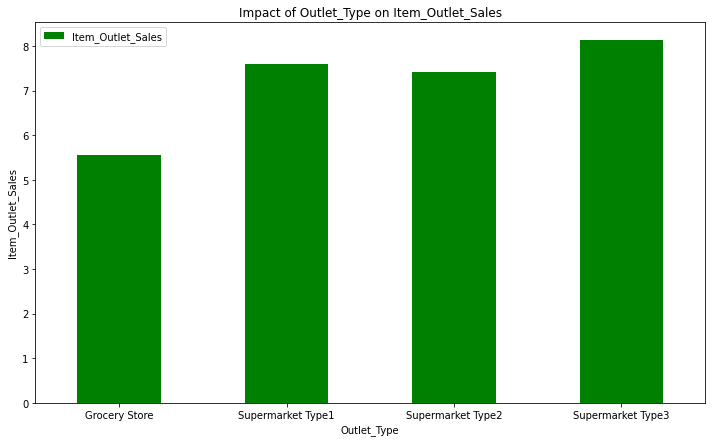

In [156]:
Outlet_Type_pivot =df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

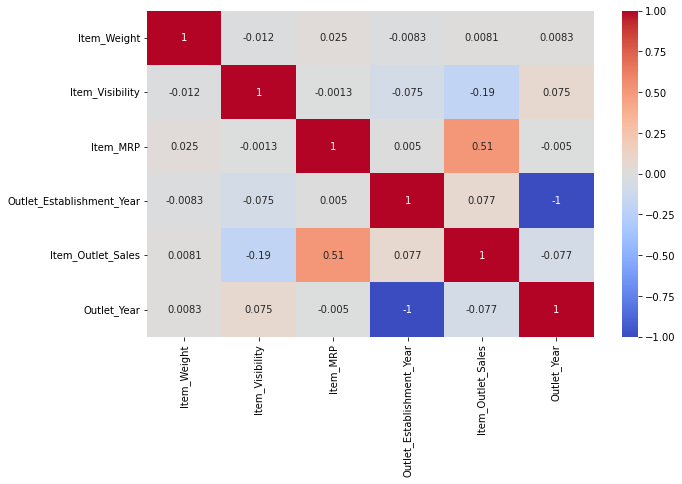

In [157]:
#Let's check the correlation between the numerical values
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [158]:
#Doing label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Outlet"]=le.fit_transform(df["Outlet_Identifier"])
cat_colms=["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"]
for c in cat_colms:
    df[c]=le.fit_transform(df[c])

In [159]:
#Deleting the columns which are already processed
new=df.drop(["Outlet_Identifier","Outlet_Establishment_Year","Item_Identifier"],axis=1)
new

,Item_Type_Combined,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
0,1,9.300,0,0.016047,4,249.8092,1,0,1,8.225808,14,9
1,0,5.920,2,0.019278,14,48.2692,1,2,2,6.096776,4,3
2,1,17.500,0,0.016760,10,141.6180,1,0,1,7.648868,14,9
3,1,19.200,2,0.000000,6,182.0950,1,2,0,6.597664,15,0
4,2,8.930,1,0.000000,9,53.8614,0,2,1,6.903451,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,0,2,1,7.929984,26,1
8519,1,8.380,2,0.046982,0,108.1570,1,1,1,6.310436,11,7
8520,2,10.600,1,0.035186,8,85.1224,2,1,1,7.085159,9,6
8521,1,7.210,2,0.145221,13,103.1332,1,2,2,7.521100,4,3


In [160]:
#Doing one hot encoding
new=pd.get_dummies(new,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"])

In [161]:
new.shape

(8523, 23)

In [162]:
#Defining variables
x=new.drop("Item_Outlet_Sales",axis=1)
y=new["Item_Outlet_Sales"]

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [164]:
#Traing the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [165]:
#Checkin cross validation score
y_pred=model.predict(x_test)
cross_val_score(model,x,y)

array([0.72131137, 0.71070495, 0.70749188, 0.71531541, 0.74011399])

In [166]:
mean_squared_error(y_test,y_pred)

0.29732990319907954